<a href="https://colab.research.google.com/github/karvs1458-gif/Inteligencia-Artificial/blob/main/Recurrentes/Predicci%C3%B3n_del_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Importamos pandas

_df = pd.read_csv("https://gist.githubusercontent.com/mevangelista-alvarado/6f4f28c00f9e683108637cb3c8d5db89/raw/1ce753283fce23eeab952fa1d660a7069bbe9104/Bitcoin_1_1_2024-6_9_2024_historical_data_coinmarketcap.csv", delimiter=';')
# Se lee desde la web de un Github
_df = _df.sort_index(ascending=False)# Se acomoda el df de manera descendente
_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
158,2024-01-03T00:00:00.000Z,2024-01-03T23:59:59.999Z,2024-01-03T09:40:00.000Z,2024-01-03T12:10:00.000Z,2781,44961.603187,45503.241795,40813.534868,42848.175641,4.634232e+10,8.393459e+11,2024-01-03T23:59:59.999Z
157,2024-01-04T00:00:00.000Z,2024-01-04T23:59:59.999Z,2024-01-04T22:22:00.000Z,2024-01-04T01:26:00.000Z,2781,42855.814761,44770.023414,42675.174007,44179.921701,3.044809e+10,8.654825e+11,2024-01-04T23:59:59.999Z
156,2024-01-05T00:00:00.000Z,2024-01-05T23:59:59.999Z,2024-01-05T23:07:00.000Z,2024-01-05T01:49:00.000Z,2781,44192.978699,44353.285859,42784.718266,44162.691630,3.233603e+10,8.651827e+11,2024-01-05T23:59:59.999Z
155,2024-01-06T00:00:00.000Z,2024-01-06T23:59:59.999Z,2024-01-06T00:10:00.000Z,2024-01-06T07:07:00.000Z,2781,44178.954607,44227.631307,43475.156431,43989.194093,1.609250e+10,8.618220e+11,2024-01-06T23:59:59.999Z
154,2024-01-07T00:00:00.000Z,2024-01-07T23:59:59.999Z,2024-01-07T14:09:00.000Z,2024-01-07T23:45:00.000Z,2781,43998.464243,44495.571471,43662.228627,43943.097229,1.933057e+10,8.609518e+11,2024-01-07T23:59:59.999Z


In [ ]:
df = _df[['timeOpen', 'open', 'high', 'low', 'close']] #Seleccionamos las columnas

In [ ]:
dates = df[['close']].values #Se convierten los datos a un numpy array

In [ ]:
from sklearn.preprocessing import MinMaxScaler #Se utiliza el escalador minmaxscaler para escalar de 0 a 1

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates) #Escala todos nuestros datos

In [ ]:
window_size = 60 #Se establece un tamaño de ventana para predecir los datos

In [ ]:
import numpy as np

def create_sequences(data, window_size):  #Se crean unas secuencias de datos para la entrada del modelo
    sequences = []
    labels = []
    for i in range(len(data) - window_size):  #Se crea la secuencia en base al tamaño de nuestra ventana
        sequences.append(data[i:i+window_size])
        # El precio es de la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels) # Pasamos nuestros datos (que están en listas) al formato especial de NumPy

X, y = create_sequences(scaled_data, window_size) # Crear las secuencias de X y Y de los datos escalados y del tamaño de la ventana

In [ ]:
split = int(len(X) * 0.8) # Se dividen los datos en conjuntos de preuba y entrenamiento como lo hemos estado haviendo en clase de 80% y 20%
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [ ]:
#Importamos nuestro modelo que ocuparemos y nuestras capas que usaremos
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

model = Sequential() #Usamos el modelo que importamos
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2]))) # Empezamos con una capa simpleRNN de 120 neuronas que regresa una secuencia
model.add(SimpleRNN(units=60, return_sequences=False)) # Añadimos una segunda capa simpleRNN con 60 neuronas que no regresa la secuencia
model.add(Dense(units=30)) # Añadimos nuestra tercera capa pero ahora densa con 30 unidades
model.add(Dense(units=1)) # Y por ultimo una capa de salida densa con 1 unidad para predecir

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam # Importamos el optimizador Adam

learning_rate = 0.001 #Le damos el valor a la tasa de aprendizaje
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilamos nuestro modelo con el optimizador Adam y nuestra funcion de perdida
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenamos nuestro modelo con 10 epocas
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1809
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0213
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0096
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0092
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0286
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0070
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0109


In [ ]:
# Hacemos nuestras predicciones
predictions = model.predict(X_test)

 #Desescalamos todos nuestros datos para poder graficarlos mejor
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 1388.3732356661203
RMSE: 1675.1461174169744


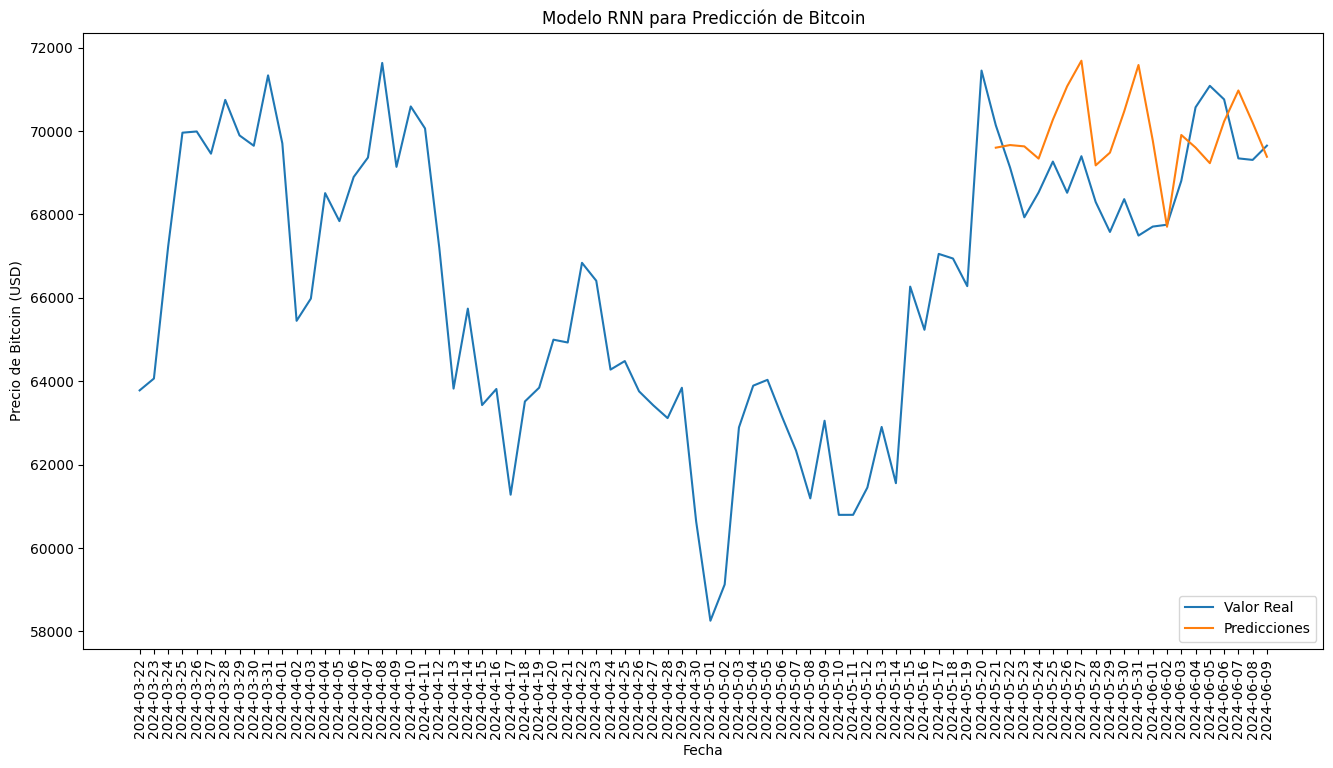

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

valid = df[split:]
# Reiniciar el índice del DataFrame de validación
valid = valid.reset_index(drop=True)
# Inicializar la columna de predicciones con NaN
valid['Predictions'] = np.nan

# Añadir las predicciones al DataFrame de validación desde el punto donde inician las predicciones
valid.loc[window_size:, 'Predictions'] = predictions
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

plt.figure(figsize=(16,8))
plt.title('Modelo RNN para Predicción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Generamos nuestra futura secuencia para los siguientes dias
future_sequences = []
# Última secuencia de los valores que tenemos
last_sequence = X[-1]

days = 10 #Aqui le damos el valor a los dias que vamos a predecir
for _ in range(days):
    # Predice el siguiente valor de la ultima secuencia
    next_value = model.predict(np.array([last_sequence]))[0, 0]

   # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a la lista de secuencias futuras
    future_sequences.append(last_sequence)

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

#Se descalan todos los valores transformados
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
# Última fecha de los datos reales
last_date = df['timeOpen'].iloc[-1]
#Inicia deste la ultima fecha agregando 1 dia a las futuras fechas
future_dates = pd.date_range(start=last_date, periods=days)[1:]
future_dates = future_dates.strftime('%Y-%m-%d').tolist()

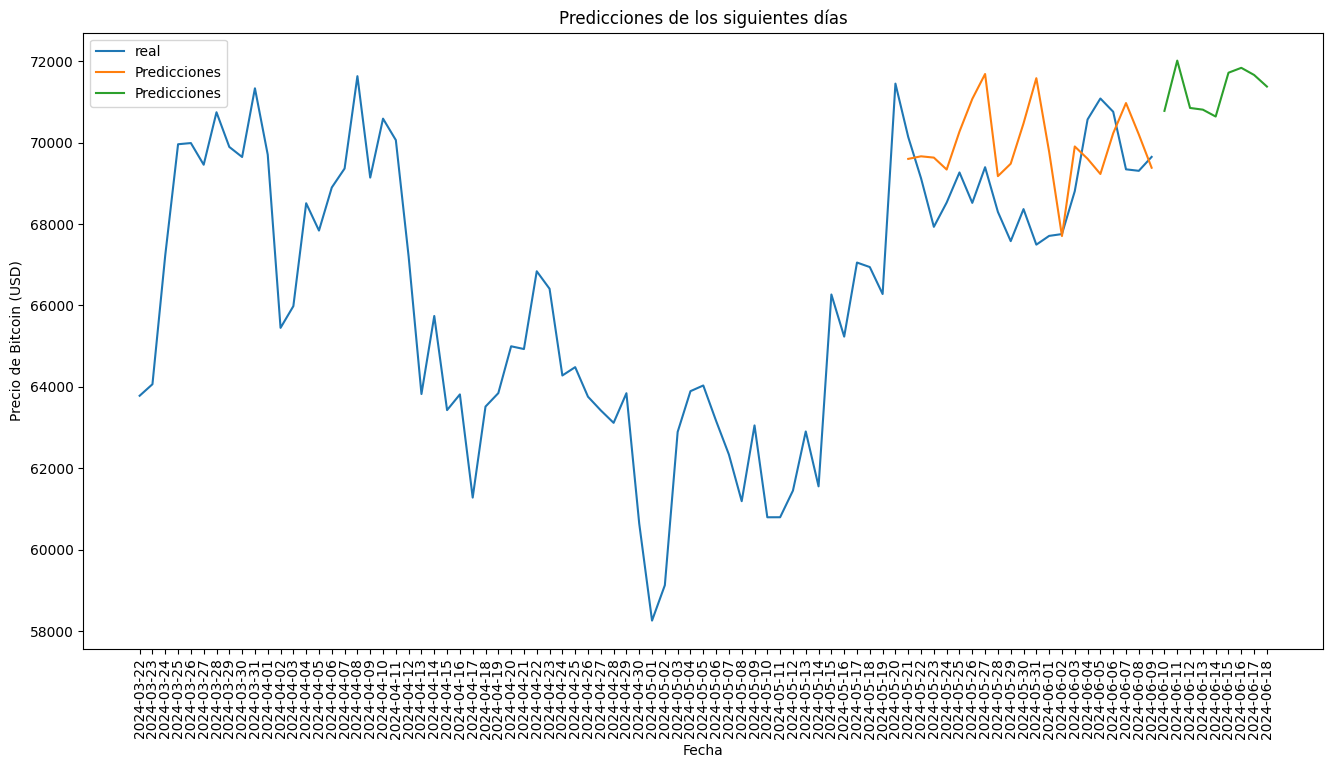

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Predicciones de los siguientes días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones'])
plt.plot(future_dates, future_predictions[:-1], label='Predicciones')
plt.legend()
plt.xticks(rotation=90)
plt.show()